<a href="https://colab.research.google.com/github/esteves-sci/alura_bootcamp/blob/main/bootcamp_imersao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALIZYNG DATA FROM DATASUS USING PYTHON AND PANDAS<br>
(2008/ago-2021/mar)



###Importing Dependencies


In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




### importing and formating the dataset
corrections
* skipping the rows at the begining and at the end with header and footer
* setting the data enconding to iso-8859-1
* setting the the thousands and decimal separators
* setting the csv sep as ";"




In [2]:
#files
file_path = ('https://raw.githubusercontent.com/esteves-sci/alura_bootcamp/main/datasets/ano-mes-processamento.csv')
df = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                 thousands='.', decimal=',')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.5,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.9,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08


In [19]:
df.head(2) #verifying head

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47


In [3]:
df.tail(2) #verifying bottom

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.5,25524615.37,23352380.22,23520045.07,25369725.89,24404417.42,24987745.86,24954391.09,25711601.13,27198788.35,26672124.45,24964871.71,25671135.81,25260713.05,25171493.79,26401745.02,29060487.72,...,32756500.63,29752825.71,35353238.97,33126994.54,33321916.56,35536937.30,35009953.87,33899286.36,33936535.21,34482719.13,33695646.06,36347762.27,35162665.51,33658226.73,36733253.84,36260374.54,38159986.89,37236918.46,37769227.09,37979735.24,37470767.39,37337272.34,35734855.79,34879373.70,35794874.64,35048141.29,34843938.16,30932236.73,34406945.17,36101619.85,40606222.82,46229357.10,44889588.33,45529496.23,43037600.45,44147353.21,46127763.88,42742773.93,45592686.49,4.973574e+09
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,15048607.23,11343166.62,14727561.06,12448821.12,10378991.59,13844384.56,13014468.49,15199322.19,15839446.00,14075642.84,15070287.19,14487053.32,14794759.93,13970147.7,12231919.68,14152357.41,12797956.47,14766108.89,14251503.37,13992321.87,13029712.13,13731431.47,14492891.90,13708967.72,13154297.48,14017191.90,13892860.69,13685193.15,12596227.92,13776613.55,...,17127571.95,18222787.66,20340897.78,20522181.19,20343407.23,21542121.59,22301468.16,23318726.05,20307075.79,18600258.14,16518323.98,13970506.60,20192152.35,18496333.16,22191795.70,18562231.92,20360779.48,20187082.38,22216154.63,23309181.24,17870194.68,17859596.85,19851940.18,18769437.77,22341629.09,20643441.06,22947163.99,21536505.16,19058243.91,22704335.27,25269773.34,26526196.39,20056592.11,20856249.30,20459325.27,22991567.76,23527050.29,22766952.62,31831917.45,2.592423e+09


In [4]:
df.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,1.512685e+07,2.271016e+07,2.459419e+07,2.543196e+07,2.651125e+07,2.785858e+07,2.833297e+07,2.780032e+07,2.788751e+07,2.714885e+07,2.474878e+07,2.873955e+07,2.777958e+07,2.802152e+07,3.118086e+07,3.055947e+07,3.206774e+07,3.158067e+07,3.261120e+07,3.306823e+07,3.241981e+07,3.218939e+07,3.116798e+07,3.156009e+07,2.992881e+07,3.299925e+07,3.341603e+07,3.386193e+07,3.299857e+07,3.377663e+07,3.450811e+07,3.357103e+07,3.320255e+07,3.426058e+07,3.372213e+07,3.306842e+07,3.274396e+07,3.454084e+07,3.483417e+07,3.514808e+07,...,4.513069e+07,4.298447e+07,4.628040e+07,4.687294e+07,4.740435e+07,4.714298e+07,4.820453e+07,4.876378e+07,4.713071e+07,4.799957e+07,4.645374e+07,4.512771e+07,4.771386e+07,4.543018e+07,4.719978e+07,4.816447e+07,5.027433e+07,4.845567e+07,5.085898e+07,5.108601e+07,4.951023e+07,5.116479e+07,4.866782e+07,4.725353e+07,4.917830e+07,4.764667e+07,4.763879e+07,4.106290e+07,4.429548e+07,4.769660e+07,5.496335e+07,5.608003e+07,5.473720e+07,5.518456e+07,5.422950e+07,5.337776e+07,5.607375e+07,5.557823e+07,6.250230e+07,6.388213e+09
std,1.915919e+07,3.087944e+07,3.251673e+07,3.333907e+07,3.754077e+07,3.867689e+07,3.929297e+07,3.774891e+07,3.822654e+07,3.667139e+07,3.430265e+07,3.926323e+07,3.798802e+07,3.847297e+07,4.310788e+07,4.137587e+07,4.382047e+07,4.373064e+07,4.493195e+07,4.676027e+07,4.472374e+07,4.465751e+07,4.249073e+07,4.345134e+07,4.112873e+07,4.590237e+07,4.661917e+07,4.658377e+07,4.580069e+07,4.662104e+07,4.756922e+07,4.704992e+07,4.517352e+07,4.835110e+07,4.796588e+07,4.603549e+07,4.662189e+07,4.871679e+07,4.792798e+07,4.943092e+07,...,5.906176e+07,5.650940e+07,6.049750e+07,6.114294e+07,6.192571e+07,6.115437e+07,6.221664e+07,6.337072e+07,6.072640e+07,6.248640e+07,6.045441e+07,5.991645e+07,6.282883e+07,5.936300e+07,6.111061e+07,6.293618e+07,6.457698e+07,6.235590e+07,6.532398e+07,6.636032e+07,6.343970e+07,6.631183e+07,6.225537e+07,6.059712e+07,6.423488e+07,6.132069e+07,6.217237e+07,5.289637e+07,5.684245e+07,6.230030e+07,7.405660e+07,7.209133e+07,7.299052e+07,7.239441e+07,7.063437e+07,6.962926e+07,7.376681e+07,7.284641e+07,8.232063e+07,8.572077e+09
min,6.578895e+05,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+

Modifying the numbers format from scientific notation to float 


In [5]:
pd.options.display.float_format = '{:.2f}'.format
df.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

In [6]:
#exploring the the column 2008/ago
df['2008/Ago'].head()

0    3231494.61
1    2089107.14
2    9352532.70
3     894271.18
4   23341218.03
Name: 2008/Ago, dtype: float64

In [7]:
df['2008/Ago'].mean()

27800320.306666665

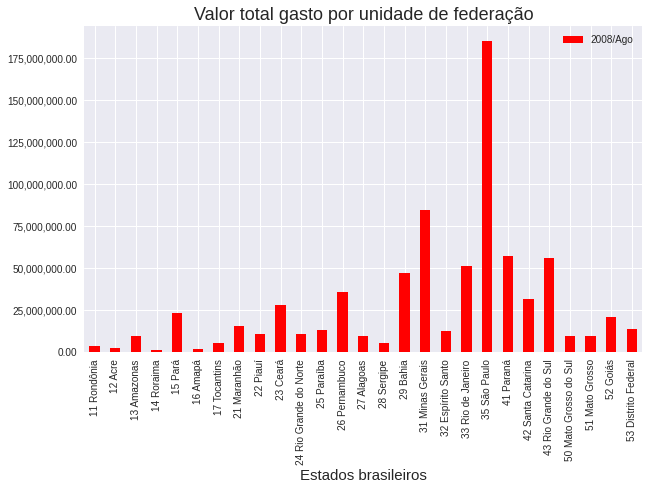

In [8]:
plt.style.use('seaborn')
ax = df.plot(x='Unidade da Federação', y = '2008/Ago', kind='bar', figsize=(10,6), color='red')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor total gasto por unidade de federação', size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

In [9]:
#exploring the most recent month and improving the chart
df['2021/Mar'].describe()

count          27.00
mean     62502301.42
std      82320629.42
min       1357751.33
25%      19814679.18
50%      31831917.45
75%      82623811.65
max     392946147.42
Name: 2021/Mar, dtype: float64

In [11]:
df['Unidade da Federação'].head()

0    11 Rondônia
1        12 Acre
2    13 Amazonas
3     14 Roraima
4        15 Pará
Name: Unidade da Federação, dtype: object

In [12]:
df['Unidade da Federação'] = df['Unidade da Federação'].str.slice(3,)
df['Unidade da Federação'].head() #Verifying


0    Rondônia
1        Acre
2    Amazonas
3     Roraima
4        Pará
Name: Unidade da Federação, dtype: object

In [16]:
df_sort = df[["Unidade da Federação", "2021/Mar"]].sort_values(by = "2021/Mar", ascending = False)


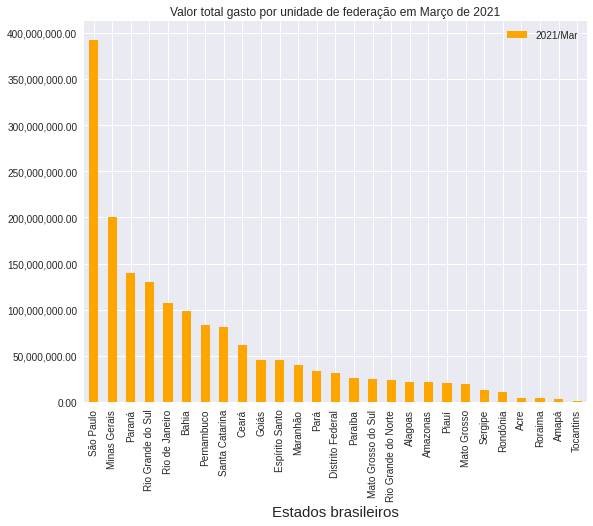

In [18]:
ax = df_sort.plot(x='Unidade da Federação', y = '2021/Mar', kind='bar', figsize=(9,7), color='orange')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor total gasto por unidade de federação em Março de 2021')
plt.xlabel("Estados brasileiros", size = 15)
plt.show()